# Exploratory Data Analysis and Feature Extraction

#### EE 242: Smart Grid Grid Sensors and Data-Driven Applications
##### Instructor: Dr. Mohsenian-Rad

##### By: Daniel O'Connor

#### Data Source: 

https://ieee-dataport.org/documents/synthetic-power-quality-disturbances-dataset-single-and-combined-disturbances-generated
##### Data Authors: 
- Uvesh Sipai
- Rajendrasinh Jadeja
- Nishant Kothari
- Tapankumar Trivedi


In [2]:
#library imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [246]:
#load in the dataframes
data_df = pd.read_csv('Data/PQData.csv',header=None)
labels_df = pd.read_csv('Data/PQLabel.csv',header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,0.53583,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
1,0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,0.53583,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
2,0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,0.53583,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
3,0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,0.53583,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
4,0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,0.53583,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791


In [247]:
labels_df.head()

,0
0,1
1,1
2,1
3,1
4,1


In [248]:
# From datasource: "Each signal in the dataset is sampled at a frequency of 5 kHz"

sampling_frequency = 5000 #Hz
time_between_samples = 1/sampling_frequency #s
time_between_samples #s

0.0002

In [249]:
#There is an issue with no column names, the title of the column is the first signal. 
#Re-labeling the columns with times

#turn the dataframes into arrays for ease of use in feature extractions/re-formatting dataframes
data_array = data_df.to_numpy() 
label_array = labels_df.to_numpy()

#combine the data
label_and_data_array = np.concatenate((label_array, data_array), axis=1)

#Calculate the time between samples (1/sr) 
times = [round(i * time_between_samples,4) for i in range(data_array.shape[1])]

#put together dataframe
columns = ['label']+ times
df = pd.DataFrame(data=label_and_data_array, columns=columns)

In [250]:
df.head()

,label,0.0,0.0002,0.0004,0.0006,0.0008,0.001,0.0012,0.0014,0.0016,...,0.198,0.1982,0.1984,0.1986,0.1988,0.199,0.1992,0.1994,0.1996,0.1998
0,1.0,0.0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
1,1.0,0.0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
2,1.0,0.0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
3,1.0,0.0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
4,1.0,0.0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791


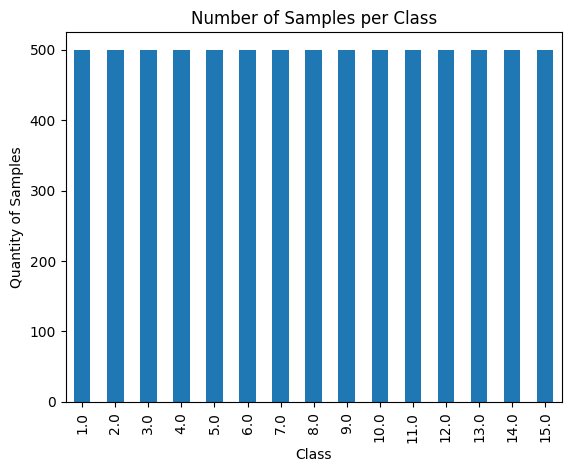

In [251]:
#plot num samples/class
df['label'].value_counts().sort_values(ascending=True).plot(kind='bar')
plt.ylabel('Quantity of Samples')
plt.xlabel('Class')
plt.title('Number of Samples per Class')
plt.show()

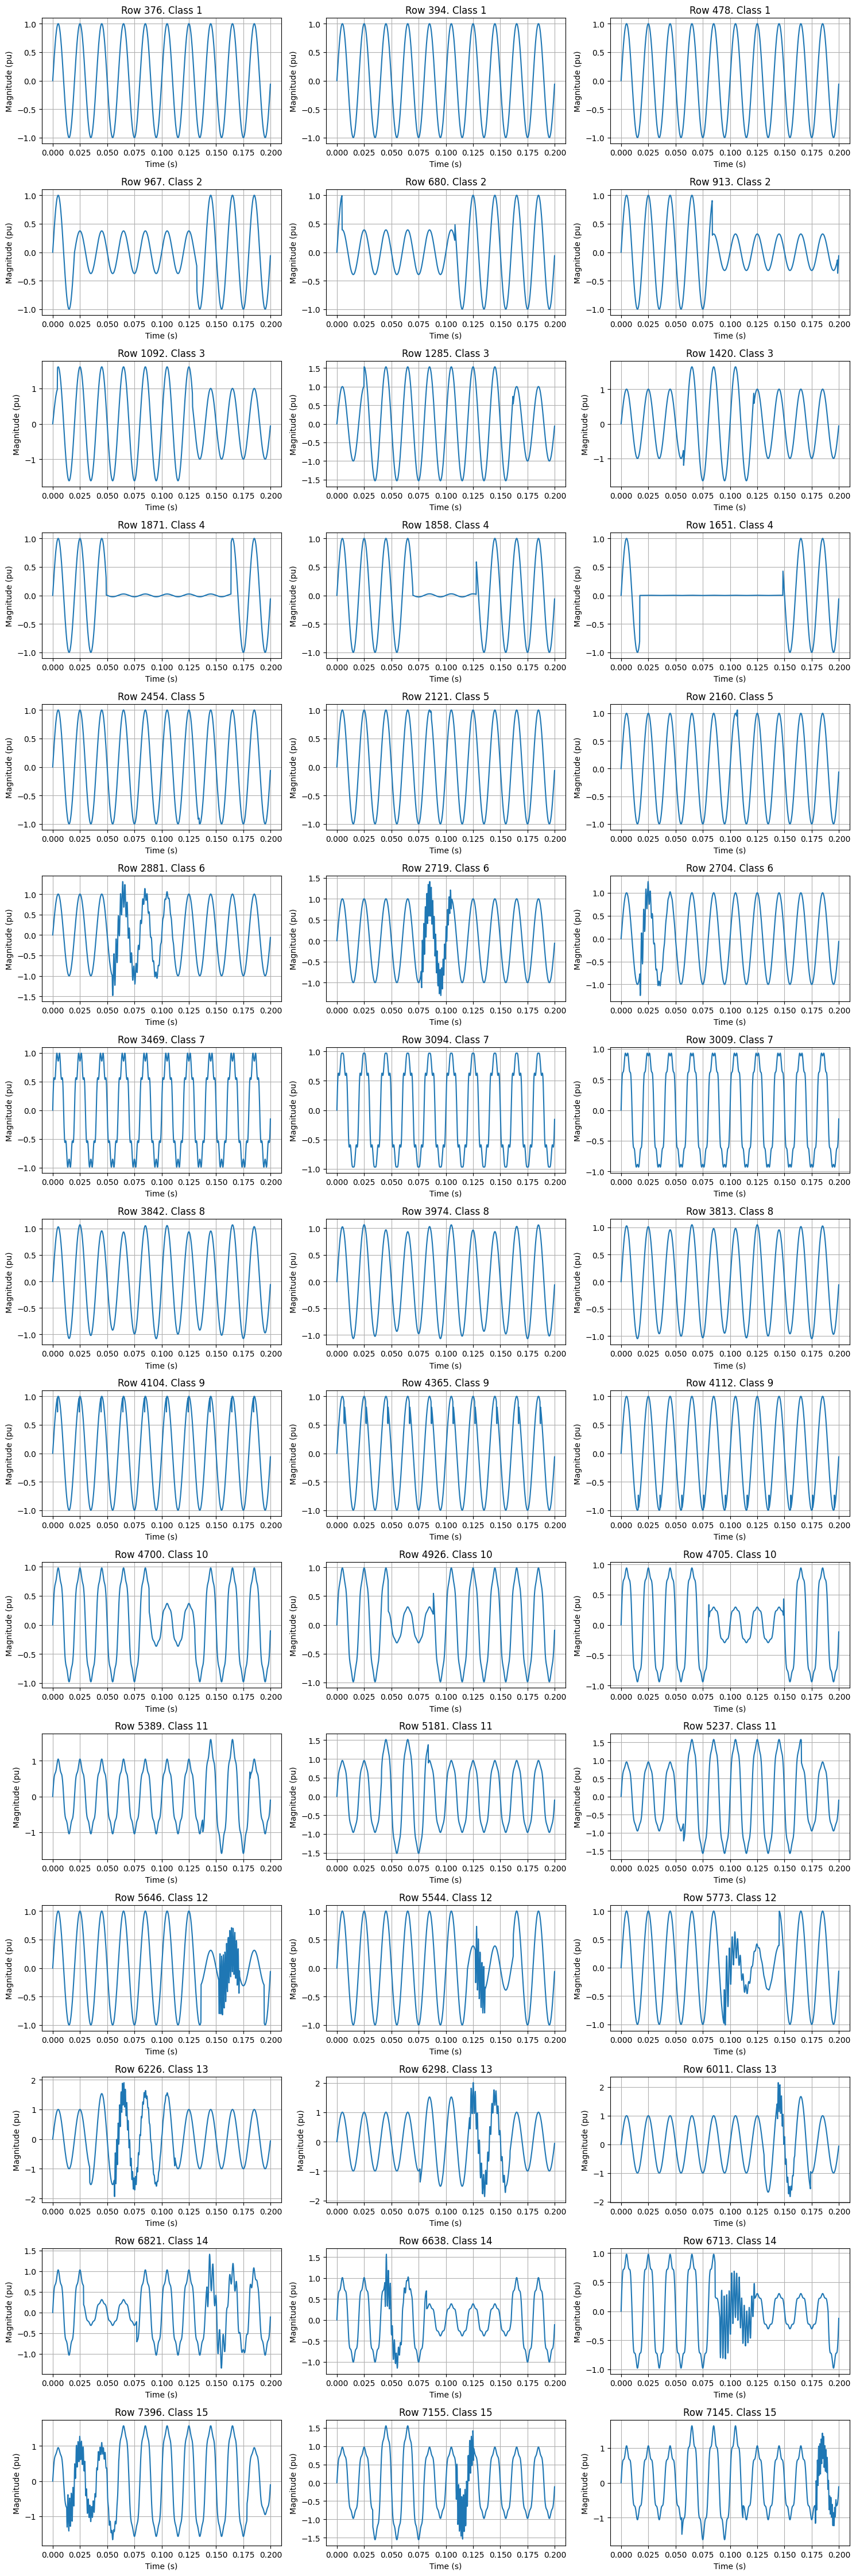

In [252]:
#plotting 3 signals of each class of PQD
#each time its run, random samples from each class are pulled
labels = np.arange(1,16)
fig, ax = plt.subplots(labels.shape[0], 3, figsize = (labels.shape[0], labels.shape[0] * 3))

#iterate through all 15 classes
for label in labels:

        sample = df[df['label'] == label].sample(3)
        row_1, row_2, row_3 = sample.index[0], sample.index[1], sample.index[2]
        data_1, data_2, data_3 = sample.iloc[0], sample.iloc[1], sample.iloc[2]

        
        #sample 1
        ax[label -1, 0].plot(times, data_1[1:])
        ax[label- 1, 0].set_title(f'Row {row_1}. Class {label}')
        ax[label-1, 0].set_xlabel('Time (s)')
        ax[label-1, 0].grid(True)
        ax[label -1, 0].set_ylabel('Magnitude (pu)')

        #sample 2
        ax[label-1, 1].plot(times, data_2[1:])
        ax[label-1, 1].set_title(f'Row {row_2}. Class {label}')
        ax[label-1, 1].set_xlabel('Time (s)')
        ax[label-1, 1].grid(True)
        ax[label-1, 1].set_ylabel('Magnitude (pu)')

        #sample 3
        ax[label-1, 2].plot(times, data_3[1:])
        ax[label-1, 2].set_title(f'Row {row_3}. Class {label}')
        ax[label-1, 2].set_xlabel('Time (s)')
        ax[label-1, 2].grid(True)
        ax[label-1, 2].set_ylabel('Magnitude (pu)')

plt.tight_layout()
plt.show()
       
        

"Each signal in the dataset is sampled at a frequency of 5 kHz, equivalent to 100 samples per cycle, ensuring precise capturing of waveform characteristics. The fundamental frequency across all signals is standardized at 50 Hz, reflecting typical power system frequencies. Additionally, all signals maintain a consistent amplitude of 1 per unit (pu), guaranteeing uniformity throughout the dataset."

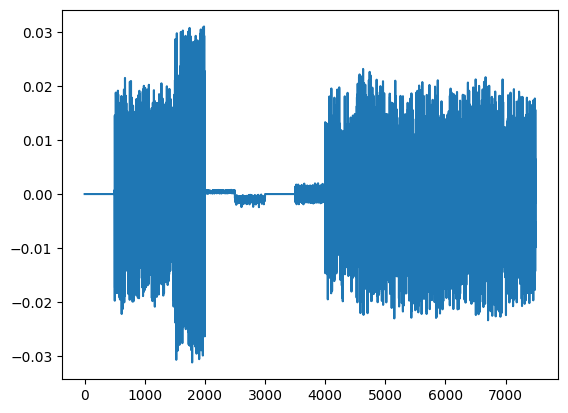

In [305]:
#checking to see if DC offset

DC = np.mean(data_array, axis=1)
plt.plot(DC)

#nothing significant

In [253]:
df.shape

(7500, 1001)

## Feature Extraction

### RMS of the Signal

In [254]:
#create new df to store labels and features
labels_and_feats_df = pd.DataFrame(data=label_array, columns=['Label'])

#using the data for each row,  calcluate RMS value across the entire signal
labels_and_feats_df['RMS_signal'] = np.sqrt((df[df.columns[1:]] ** 2).sum(axis=1) / len(df.columns[1:]))

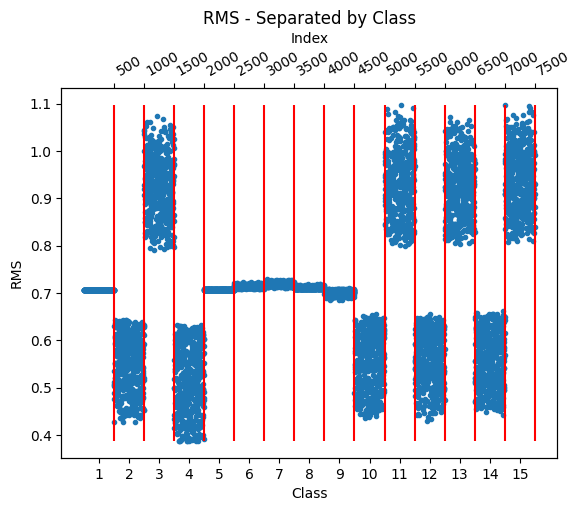

In [344]:
# class_sep_lines = [500 * i for i in range(1,15)]

# plt.plot(labels_and_feats_df['RMS_signal'].values,'.')

# plt.vlines(x=class_sep_lines, ymin=labels_and_feats_df['RMS_signal'].min(), ymax=labels_and_feats_df['RMS_signal'].max(), colors='r')
# plt.xlabel('Index')
# plt.ylabel('RMS')
# plt.title('RMS Value by Class')
# plt.savefig('RMS.png')
# plt.show()

class_sep_lines = [500 * i for i in range(1, 16)]  #Class separation lines
class_labels = [500 * i - 250 for i in range(1, 16)] #class label indices
fig, ax1 = plt.subplots()

#plot RMS
ax1.plot(labels_and_feats_df['RMS_signal'].values, '.')
ax1.vlines(x=class_sep_lines, ymin=labels_and_feats_df['RMS_signal'].min(), ymax=labels_and_feats_df['RMS_signal'].max(), colors='r')
ax1.set_xlabel('Class')
ax1.set_ylabel('RMS')
ax1.set_title('RMS - Separated by Class')

#set class labels
ax1.set_xticks(class_labels)
ax1.set_xticklabels(range(1, 16))

#add top axis
ax2 = ax1.twiny()

#for indices
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(class_sep_lines)
ax2.set_xticklabels(class_sep_lines)
ax2.set_xlabel('Index')
plt.setp(ax2.get_xticklabels(), rotation=30, ha='left')

plt.savefig('RMS.png')
plt.show()


### Crest Factor (CF)




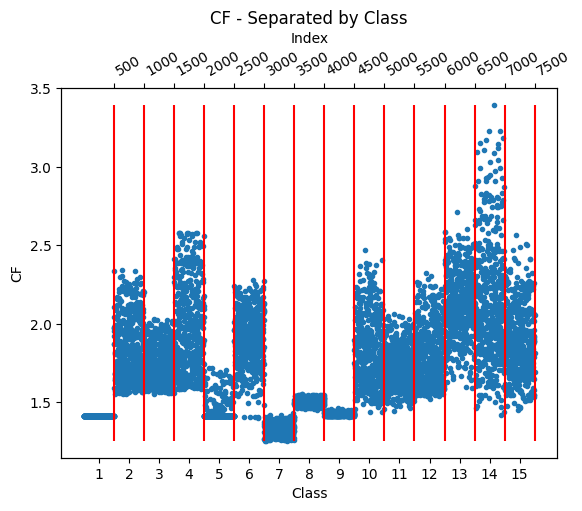

In [298]:
#find max value across signal and divide by RMS
labels_and_feats_df['CF'] = np.max(data_array,axis=1) / labels_and_feats_df['RMS_signal']



class_sep_lines = [500 * i for i in range(1, 16)]  #class seperation lines
class_labels = [500 * i - 250 for i in range(1, 16)] #class indices

fig, ax1 = plt.subplots()

#plot crest factor
ax1.plot(labels_and_feats_df['CF'].values, '.')
ax1.vlines(x=class_sep_lines, ymin=labels_and_feats_df['CF'].min(), ymax=labels_and_feats_df['CF'].max(), colors='r')
ax1.set_xlabel('Class')
ax1.set_ylabel('CF')
ax1.set_title('CF - Separated by Class')

#set ckass labels
ax1.set_xticks(class_labels)
ax1.set_xticklabels(range(1, 16))

#add second axis
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(class_sep_lines)
ax2.set_xticklabels(class_sep_lines)
ax2.set_xlabel('Index')
plt.setp(ax2.get_xticklabels(), rotation=30, ha='left')

plt.savefig('CF.png')
plt.show()

### Harmonics 

#### Total Harmonic Distortion (THD)



In [257]:
def total_harmonic_distortion(n_harmonics: int, signal_array: np.array, fundamental_frequency: int, sampling_rate: int, return_harmonics_array=False):
    '''
    input:
    n_harmonics: number of harmonics to calculate 
    signal_array: array of time series signals
    fundamental_freqency: the fundamental freq
    sampling_rate: the sampling rate in Hz
    return harmonics_array: returns array with magnitudes up to n_harmonics for each signal

    output:
    THD calculated up to n_harmonics
    output_shape : (num_samples,1)
    '''
    harmonics = np.arange(1,n_harmonics+1) #harmonics [1-n_harmoics]
    # print(len(harmonics))
    harmonic_magnitude_array = np.zeros((signal_array.shape[0], len(harmonics))) #array to store the harmonic magnitudes for each signal

    N = signal_array.shape[1] #number of samples per signal

    #iterate through the harmonics
    for h in harmonics:
        #temporary store real and imaginary components of DFT
        real = np.zeros(signal_array.shape)
        imag = np.zeros(signal_array.shape)

        #iterate each timestep
        for n in np.arange(N):
            #filling in real and imag array by taking the entire column at timestep n
            real[:,n] = signal_array[:,n] * np.cos((2 * np.pi * h * fundamental_frequency * n) / sampling_rate)
            imag[:,n] = signal_array[:,n] * np.sin((2 * np.pi * h * fundamental_frequency * n) / sampling_rate)
            
        #sum each signals real and imag across all timesteps and multiply by constant
        real_sum = (np.sqrt(2) / N) * np.sum(real, axis=1)
        imag_sum = (-np.sqrt(2) / N) * np.sum(imag, axis=1)
        # print(real_sum.shape)

        #fill in magnitude at h harmonic
        
        harmonic_magnitude_array[:, h-1] = np.sqrt(real_sum**2 + imag_sum**2)
    
    if return_harmonics_array:
        return harmonic_magnitude_array
    
    #total harmonic distortion
    fundamental_harmonic = harmonic_magnitude_array[:,0] #first harmonic
    
    #calculate THD
    THD = np.sqrt(np.sum((harmonic_magnitude_array[:,1:] / fundamental_harmonic[:, np.newaxis])**2,axis=1))

    return THD
    

    
    





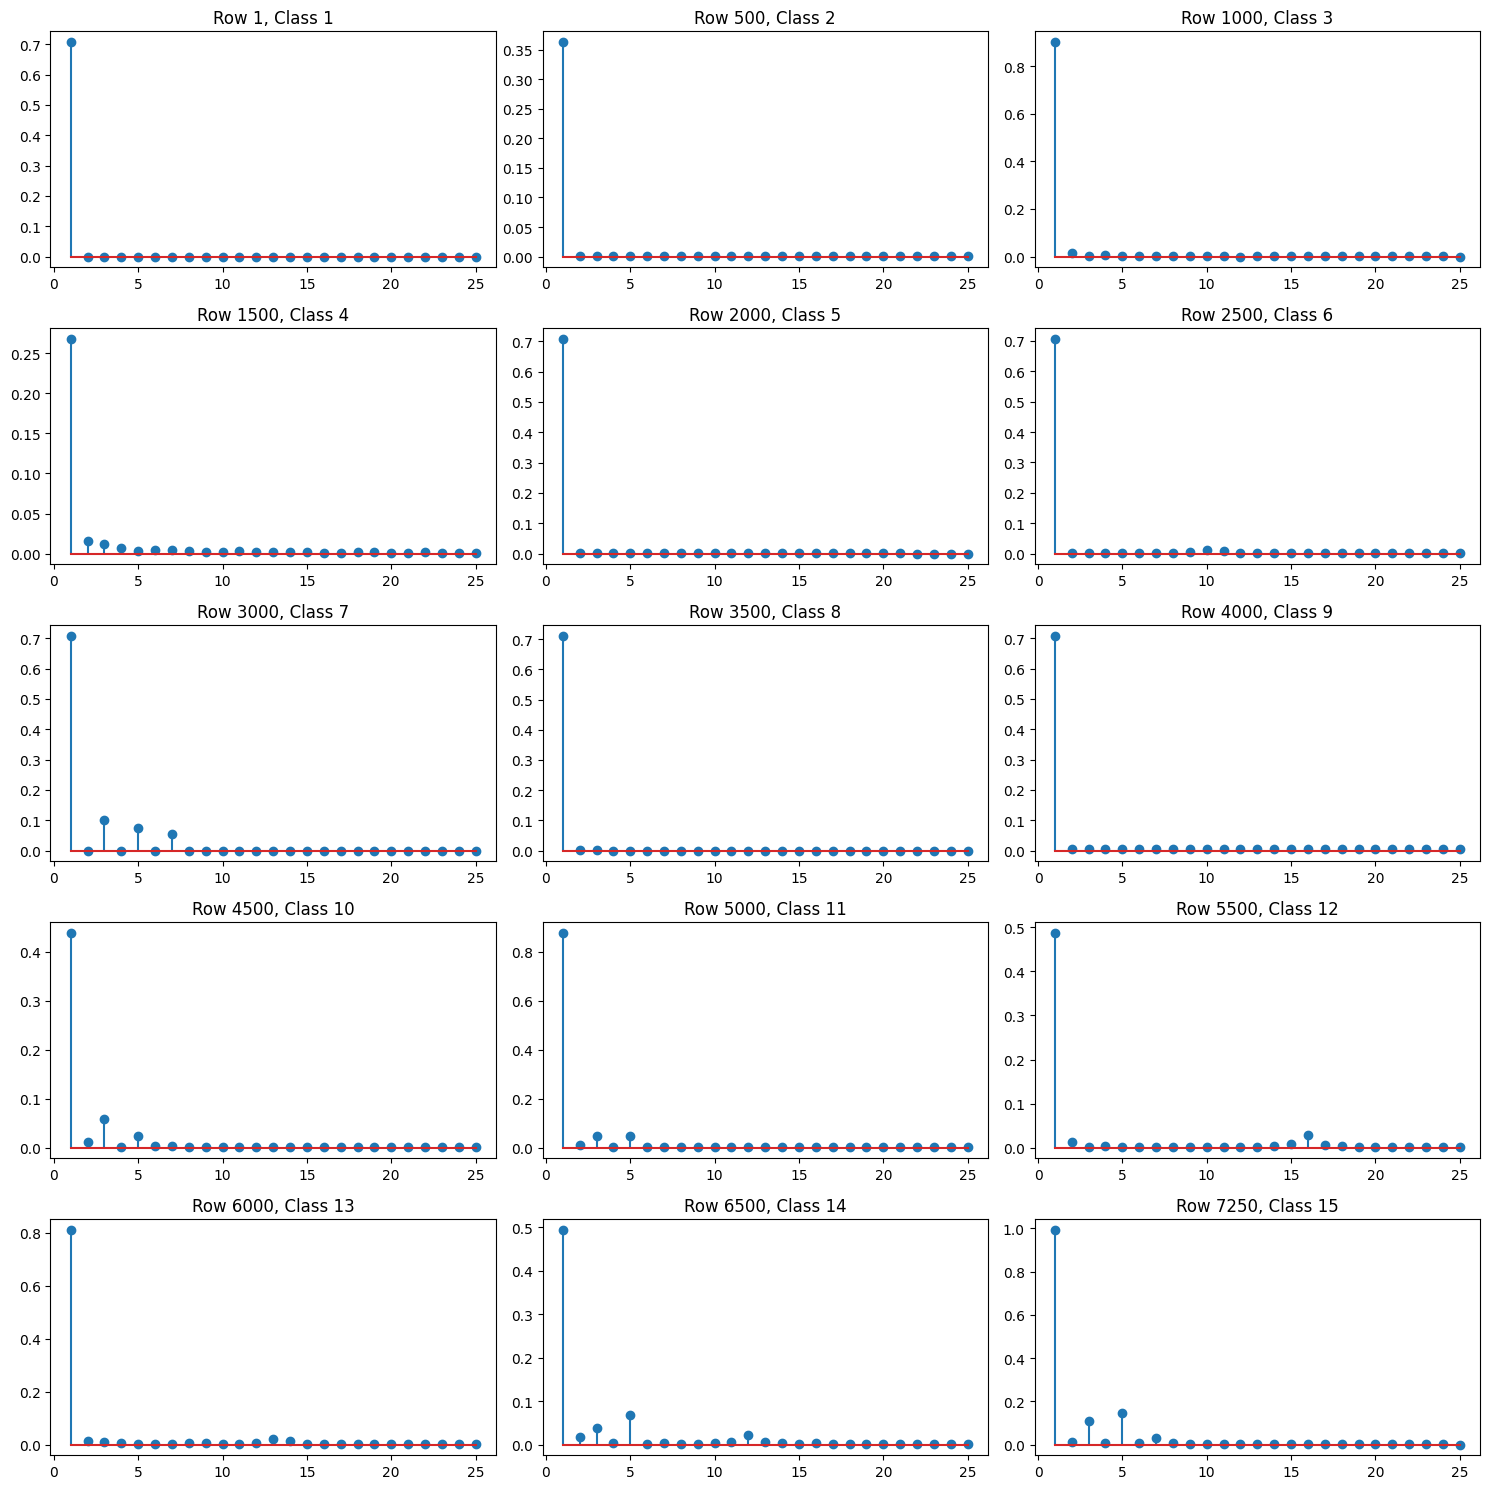

In [258]:
#sample plots at 25 harmonics
harmonic_mags = total_harmonic_distortion(25, data_array, fundamental_frequency=50, sampling_rate=5000, return_harmonics_array=True)

#pulls one from each class - need the 1 due to class 1 only having 499 samples.
rows_to_sample = [1] + [500*i for i in range(1,14)] + [7250]

fig, axs = plt.subplots(5,3, figsize=(15,15))

#stem plot one from each class
for i,sample in enumerate(rows_to_sample):

    row = i // 3
    col = i % 3

    ax = axs[row,col]

    ax.stem(np.arange(1,harmonic_mags.shape[1] + 1), harmonic_mags[sample, :])
    ax.set_title(f'Row {sample}, Class {i+1}')

plt.tight_layout()
plt.show()



In [259]:
THD = total_harmonic_distortion(n_harmonics=50, signal_array=data_array, fundamental_frequency=50, sampling_rate=5000, return_harmonics_array=False)

#add to features df
labels_and_feats_df['THD'] = THD

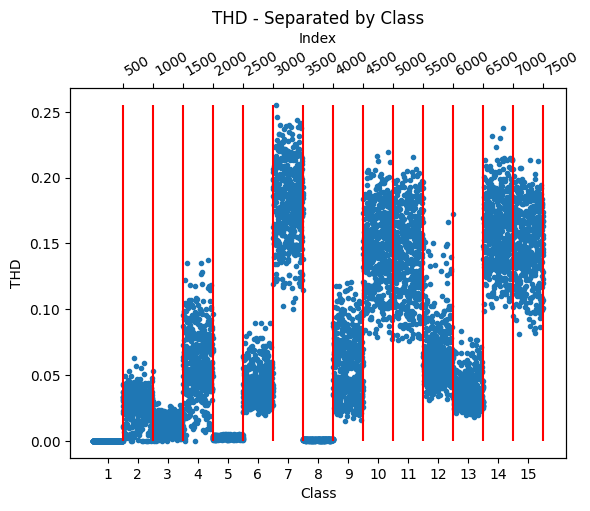

In [300]:
class_sep_lines = [500 * i for i in range(1, 16)]  #vertical lines
class_labels = [500 * i - 250 for i in range(1, 16)] #label indices

fig, ax1 = plt.subplots()

#Plot THD
ax1.plot(THD, '.')
ax1.vlines(x=class_sep_lines, ymin=THD.min(), ymax=THD.max(), colors='r')
ax1.set_xlabel('Class')
ax1.set_ylabel('THD')
ax1.set_title('THD - Separated by Class')
ax1.set_xticks(class_labels)
ax1.set_xticklabels(range(1, 16))

ax2 = ax1.twiny()

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(class_sep_lines)
ax2.set_xticklabels(class_sep_lines)
ax2.set_xlabel('Index')
plt.setp(ax2.get_xticklabels(), rotation=30, ha='left')

plt.savefig('THD.png')
plt.show()

#### Phasor Harmonic Index (PHI)




In [261]:


def phasor_harmonic_index(n_harmonics: int, signal_array: np.array, fundamental_frequency: int, sampling_rate: int, return_harmonics_phasors_array=False):
    '''
    input:
    n_harmonics: number of harmonics to calculate 
    signal_array: array of time series signals
    fundamental_freqency: the fundamental freq
    sampling_rate: the sampling rate in Hz
    return harmonics_phasors_array: returns array with phase angles up to n_harmonics for each signal

    output:
    PHI calculated up to n_harmonics
    output_shape : (num_samples,1)
    '''
    harmonics = np.arange(1,n_harmonics+1) #harmonics [1-n_harmoics]
    # print(len(harmonics))
    harmonic_magnitude_array = np.zeros((signal_array.shape[0], len(harmonics))) #array to store the harmonic magnitudes for each signal
    harmonics_phasor_angles = np.zeros(harmonic_magnitude_array.shape) #array to store harmonics phase angles (same shape as mag array)

    N = signal_array.shape[1] #number of samples per signal

    #iterate through the harmonics
    for h in harmonics:
        #temporary store real and imaginary components of DFT
        real = np.zeros(signal_array.shape)
        imag = np.zeros(signal_array.shape)

        #
        for n in np.arange(N):
            #filling in real and imag array by taking the entire column at timestep n
            real[:,n] = signal_array[:,n] * np.cos((2 * np.pi * h * fundamental_frequency * n) / sampling_rate)
            imag[:,n] = signal_array[:,n] * np.sin((2 * np.pi * h * fundamental_frequency * n) / sampling_rate)
            
        #sum each signals real and imag across all timesteps and multiply by constant
        real_sum = (np.sqrt(2) / N) * np.sum(real, axis=1)
        imag_sum = (-np.sqrt(2) / N) * np.sum(imag, axis=1)
        # print(real_sum.shape)


        #fill in magnitude and phase angle at h harmonic
        harmonic_magnitude_array[:, h-1] = np.sqrt(real_sum**2 + imag_sum**2)
        harmonics_phasor_angles[:, h-1] = np.arctan(imag_sum / real_sum)
        
    if return_harmonics_phasors_array:
        return harmonics_phasor_angles
    
    #Phasor harmonic index
    fundamental_phase_angle = harmonics_phasor_angles[:,0] #first harmonic phasor
    
    #calculate PHI 
    PHI = np.sum(harmonic_magnitude_array * np.abs(np.cos(harmonics_phasor_angles - fundamental_phase_angle[:,np.newaxis])), axis=1) / (np.sum(harmonic_magnitude_array, axis=1))

    return PHI

    

    
    





In [262]:
#calculate PHI up to 50th harmonic
PHI = phasor_harmonic_index(50,data_array,50,5000)

#add to features df
labels_and_feats_df['PHI'] = PHI


C:\Users\oconn\AppData\Local\Temp\ipykernel_29836\3501424482.py:32: RuntimeWarning: divide by zero encountered in divide
  harmonics_phasor_angles[:, h-1] = np.arctan(imag_sum / real_sum)


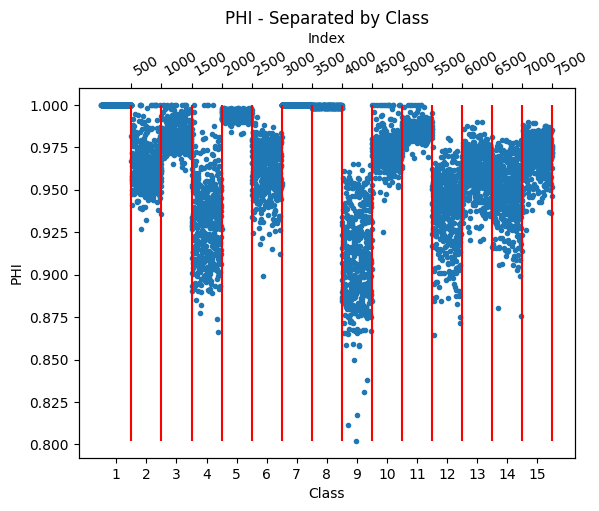

In [302]:
#plot
class_sep_lines = [500 * i for i in range(1, 16)] 
class_labels = [500 * i - 250 for i in range(1, 16)]

fig, ax1 = plt.subplots()
ax1.plot(PHI, '.')
ax1.vlines(x=class_sep_lines, ymin=PHI.min(), ymax=PHI.max(), colors='r')
ax1.set_xlabel('Class')
ax1.set_ylabel('PHI')
ax1.set_title('PHI - Separated by Class')


ax1.set_xticks(class_labels)
ax1.set_xticklabels(range(1, 16))


ax2 = ax1.twiny()

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(class_sep_lines)
ax2.set_xticklabels(class_sep_lines)
ax2.set_xlabel('Index')
plt.setp(ax2.get_xticklabels(), rotation=30, ha='left')

plt.savefig('PHI.png')
plt.show()

C:\Users\oconn\AppData\Local\Temp\ipykernel_29836\3501424482.py:32: RuntimeWarning: divide by zero encountered in divide
  harmonics_phasor_angles[:, h-1] = np.arctan(imag_sum / real_sum)


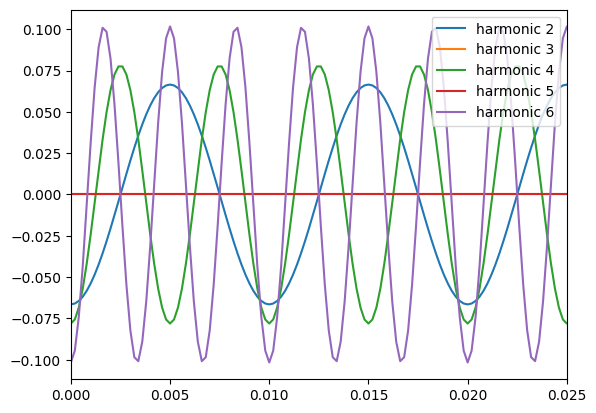

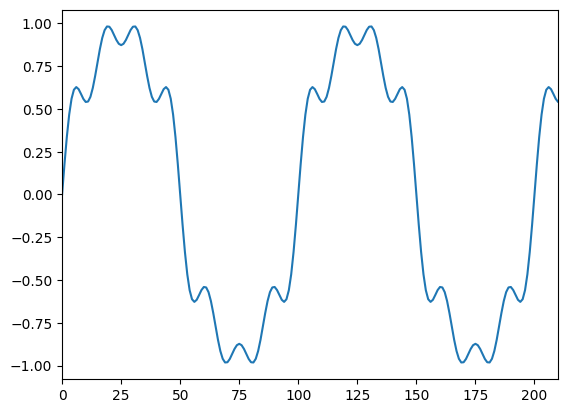

In [370]:
#Plotting some of the harmonics with their phases
phase_angles = phasor_harmonic_index(7,data_array[3000:4000,:], 50, 5000,True)
phase_magnitudes = total_harmonic_distortion(7,data_array[3000:4000,:],50,5000,True)
times =np.array([round(i * time_between_samples,4) for i in range(data_array.shape[1])])
row = 5 #0 correspoinds to 3000
n_harmonics = np.arange(2,7)


#an interesting look into how the phase angles are differnt 
for h in n_harmonics:
    harmonic_signal = phase_magnitudes[row,h] * np.sin(2 *np.pi * h * 50 * np.array(times) + phase_angles[row,h])
    plt.plot(times, harmonic_signal, label=f'harmonic {h}')

plt.legend()
plt.xlim(0,0.025)
plt.show()

#this sample has even harmonics
#second plot is original signal 

plt.plot(data_array[3005,:])
plt.xlim(0,210) #in index, not time
plt.show()

In [368]:
#to-do create funciton to plot harmonics (mag and phase angle) vs. original signal 

#### Inter-Harmonics



In [264]:
def total_interharmonics_distortion(signal_array, fundamental_freq, sampling_rate, freq_limit = 2500):
    '''
    input:
    signal_array: array of signals
    fundamental_feq: the fundamental freq
    sampling_rate : the sampling rate
    freq_limit: the limit to calcluate TIHD up until

    output:
    TIHD: total interharmonic distortion
    shape (n_samples, 1)
    '''

    

    N = signal_array.shape[1] #number of samples per signal
    delta_f = sampling_rate / N #minimum frequency resolution f_0 / N
    n_bins =  int(freq_limit // delta_f) #number of freq bins 
    delta_t = 1/sampling_rate #time between samples , in seconds

    interharmonic_magnitude_array = np.zeros((signal_array.shape[0], n_bins)) #array to store the harmonic magnitudes for each signal
    #cycle through freq bins
    for k in np.arange(1, n_bins):
        
        #temporary store real and imaginary components of DFT
        real = np.zeros(signal_array.shape)
        imag = np.zeros(signal_array.shape)

        freq = k * delta_f #each freq step

        #filter out harmonics (except for h_1)
        if (freq % fundamental_freq == 0) & (freq != fundamental_freq):
            continue
        # print(freq)

        #cycle through each timestep
        for n in np.arange(N):
            
            timestep = n * delta_t
            #filling in real and imag array by taking the entire column at timestep n
            real[:,n] = signal_array[:,n] * np.cos((2 * np.pi * freq * timestep))
            imag[:,n] = signal_array[:,n] * np.sin((2 * np.pi * freq * timestep))
            
        real_sum = (np.sqrt(2) / N) * np.sum(real, axis=1)
        imag_sum = (-np.sqrt(2) / N) * np.sum(imag, axis=1)

        #pull out fundamental magnitude
        if freq == fundamental_freq:
            fundamental_mag = np.sqrt(real_sum**2 + imag_sum**2)
            continue
        #else, fill in IH array with IH magnitudes 
        interharmonic_magnitude_array[:, k-1] = np.sqrt(real_sum**2 + imag_sum**2)


    #calc TIHD
    TIHD = np.sqrt(np.sum((interharmonic_magnitude_array / fundamental_mag[:, np.newaxis])**2, axis=1))
    return TIHD

    

In [283]:
#calculate TIHD
TIHD = total_interharmonics_distortion(data_array, 50, 5000, 2500)

#add to df
labels_and_feats_df['TIHD'] = TIHD

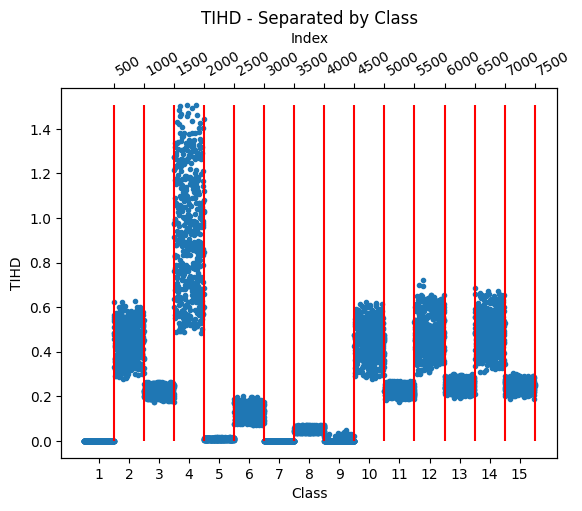

In [345]:
class_sep_lines = [500 * i for i in range(1, 16)]  
class_labels = [500 * i - 250 for i in range(1, 16)]

fig, ax1 = plt.subplots()

ax1.plot(TIHD, '.')
ax1.vlines(x=class_sep_lines, ymin=TIHD.min(), ymax=TIHD.max(), colors='r')
ax1.set_xlabel('Class')
ax1.set_ylabel('TIHD')
ax1.set_title('TIHD - Separated by Class')


ax1.set_xticks(class_labels)
ax1.set_xticklabels(range(1, 16))


ax2 = ax1.twiny()

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(class_sep_lines)
ax2.set_xticklabels(class_sep_lines)
ax2.set_xlabel('Index')
plt.setp(ax2.get_xticklabels(), rotation=30, ha='left')

plt.savefig('TIHD.png')
plt.show()

In [371]:
#save dataframe as csv
labels_and_feats_df.to_csv('labels_and_feats_df.csv', index=False)

#### Differencing (In progress)

In [267]:
first_order_differencing = np.diff(data_array,n=1,axis=1)
second_order_differencing = np.diff(data_array, n=2, axis=1)

In [268]:
median = np.median(first_order_differencing, axis=1)
median

array([-0.00197, -0.00197, -0.00197, ...,  0.0059 , -0.00443,  0.0003 ])

In [311]:

def mad_event_detection(diff_array, gamma=1.4826, zeta=5):
    
    #calculate the median and MAD for the difference array
    median_diff = np.median(diff_array, axis=1)
    mad = gamma * np.median(np.abs(diff_array - median_diff[:, np.newaxis]), axis=1)
    
    #threshholds
    lower_threshold =  median_diff[:, np.newaxis] - zeta * mad[:, np.newaxis]
    upper_threshold =  median_diff[:, np.newaxis] + zeta * mad[:, np.newaxis]
    
    events = np.zeros(diff_array.shape)

    events[diff_array >= upper_threshold] = 1
    events[diff_array <=lower_threshold] = 1
    
    return events, lower_threshold, upper_threshold

b,l,u =mad_event_detection(first_order_differencing)
np.sum(b, axis=1)

array([ 0.,  0.,  0., ..., 58., 35., 29.])

2.0


(array([-0.10206971]), array([0.10196571]))

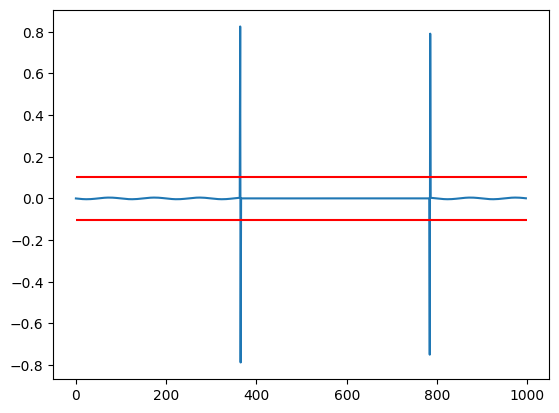

In [270]:
row = 1650

plt.plot(second_order_differencing[row, :])
plt.hlines(l[row],xmin=0,xmax=999, colors='r')
plt.hlines(u[row],xmin=0,xmax=999, colors='r')
print(np.sum(b[row,:]))
l[row], u[row]

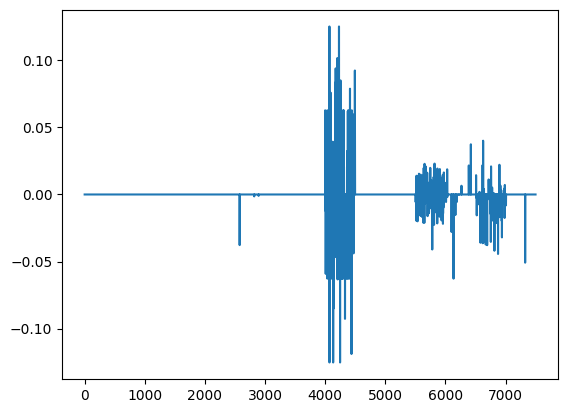

In [271]:
plt.plot(np.median(data_array, axis=1))